# Problem 3

## Part (b) 

In [410]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import pandas as pd

In [411]:
from scipy.io import loadmat
hw3 = loadmat('hw3data.mat')

In [645]:
data = hw3['data']
labels = hw3['labels']

#apply affine expansion
intercept = np.ones((np.shape(data)[0],1))
data = np.hstack((intercept, data))

In [716]:
#define objective funtion
def obj(x, y, w):
    b = 1/np.shape(x)[0] * np.sum(np.log(1+np.exp(x.dot(w)))  - y*((x.dot(w))))
    return b

In [647]:
#define gradient function
def grad(x,y,w):
    a= np.exp(x.dot(w))
    b1= (1/np.shape(x)[0]*np.sum((a/(1+a))*x-y*x,axis=0)).reshape((np.shape(w)[0],1))
    return b1

In [787]:
#run the gradient descent algorithm on the original data

#reset initial beta
beta = np.zeros((np.shape(data)[1],1))

#define stopping condition
threshold = 0.65064

l = grad(data,labels,beta)
o = obj(data,labels,beta)
count = 0

while ( o > threshold):
    eta=1
    while(obj(data,labels,beta - eta*l)> (o - 1/2*eta*(np.sum(l*l)))):
        eta = eta/2
    
    beta = beta - eta*l
    l = grad(data,labels,beta)
    o = obj(data,labels,beta)
    count += 1

print("Number of iterations: ", count, "\n"
      "Beta: ", '\n', beta, '\n'
      "Objective function value: ", o, "\n")


Number of iterations:  4658 
Beta:  
 [[-9.57915501e-01]
 [-7.42639405e-03]
 [ 2.09527203e+00]
 [-1.12412797e-03]] 
Objective function value:  0.6506399987127174 

CPU times: user 8.04 s, sys: 124 ms, total: 8.17 s
Wall time: 4.17 s


In [681]:
y_hat = data.dot(beta)

In [682]:
np.place(y_hat, y_hat<=0, 0)
np.place(y_hat, y_hat>0, 1)

In [683]:
#trainig error rate
1-sum(y_hat == labels)/len(labels)

array([0.37036133])

# Part (c)

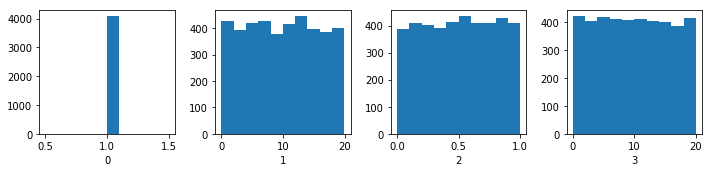

In [781]:
#observe the distributions of input features. 
#The first graph is just the distribution of intercept, therefore all 1's.

fig = plt.figure(figsize=(10,2.5))

for i in range(np.shape(data)[1]):
    plt.subplot(1,4,i+1)
    plt.hist(data[:,i])
    plt.xlabel(i)
    
plt.tight_layout()
plt.show()

In [782]:
#linear transformation scaler
scaler = np.diag(1/data.max(axis=0))
data_sc = data.dot(scaler)

In [754]:
#run the gradient descent algoritm on linearly tranformed data

#reset initial beta
beta = np.zeros((np.shape(data)[1],1))

#stopping condition
threshold = 0.65064

l = grad(data_sc,labels,beta)
o = obj(data_sc,labels,beta)
count = 0

while ( o > threshold):
    eta=1
    while(obj(data_sc,labels,beta - eta*l)> (o - 1/2*eta*(l.transpose()[0].dot(l)))):
        eta = eta/2
    
    beta = beta - eta*l
    l = grad(data_sc,labels,beta)
    o = obj(data_sc,labels,beta)
    count +=1

print("Number of iterations: ", count, "\n"
      "Beta: ", '\n', beta, '\n'
      "Objective function value: ", o, "\n"
      "Gradient value: ",'\n', l, '\n')

Number of iterations:  377 
Beta:  
 [[-0.95537672]
 [-0.1534398 ]
 [ 2.09978214]
 [-0.02757352]] 
Objective function value:  0.6506399857204013 
Gradient value:  
 [[ 1.92804044e-04]
 [-9.78866902e-05]
 [-1.65559103e-04]
 [-1.04159829e-04]] 

CPU times: user 556 ms, sys: 11.5 ms, total: 568 ms
Wall time: 339 ms


In [585]:
#training error rate
y_hat=data_sc.dot(beta)
np.place(y_hat, y_hat<=0, 0)
np.place(y_hat, y_hat>0, 1)
1 - sum(y_hat == labels)/len(labels)

array([0.37060547])

# Part (d)

### Original data

In [788]:
#split data into training and validation set using floor(0.8n) as the cutoff number.

sel = int(np.floor(0.8*np.shape(data)[0]))
x_train = data[0:sel,:]
y_train = labels[0:sel]
x_val = data[sel:np.shape(data)[0],:]
y_val = labels[sel:np.shape(data)[0]]

In [796]:
#run the gradient descent algorithm on the original data using stopping condition defined by part (d).

#reset intial beta
beta = np.zeros((np.shape(data)[1],1))

#threshold = 0.65064
l = grad(x_train,y_train,beta)
o = obj(x_train,y_train,beta)
p=0
errors =[1]
count = 0

while 1:    
    eta=1
    while(obj(x_train,y_train,beta - eta*l)> (o - 1/2*eta*(np.sum(l*l)))):
        eta = eta/2
    
    if 2**p == count:
        y_hat=x_val.dot(beta)
        np.place(y_hat, y_hat<=0, 0)
        np.place(y_hat, y_hat>0, 1)
        error = 1 - sum(y_hat.astype(int) == y_val)/len(y_val)
        if (error > 0.99*(min(errors)) and count >=32):
            break
        p+=1
        errors.append(error)
    
    beta = beta - eta*l
    l = grad(x_train,y_train,beta)
    o = obj(x_train,y_train,beta)
    count += 1
    
print("Number of iterations: ", count, "\n"
      "Validation error rate: ", error, '\n'
      "Objective function value: ", o, "\n")

Number of iterations:  512 
Validation error rate:  [0.38292683] 
Objective function value:  0.6550696234597402 

CPU times: user 1.25 s, sys: 26.4 ms, total: 1.28 s
Wall time: 706 ms


In [790]:
y_hat=x_train.dot(beta)
np.place(y_hat, y_hat<=0, 0)
np.place(y_hat, y_hat>0, 1)
1 - sum(y_hat == y_train)/len(y_train)

array([0.36782662])

### linearly transformed data

In [653]:
sel = int(np.floor(0.8*np.shape(data)[0]))
x_sc_train = data_sc[0:sel,:]
y_train = labels[0:sel]
x_sc_val = data_sc[sel:np.shape(data)[0],:]
y_val = labels[sel:np.shape(data)[0]]

In [795]:
#run the gradient descent algorithm on the linearly transformed data using stopping condition defined by part (d).

beta = np.zeros((np.shape(data)[1],1))

#threshold = 0.65064
l = grad(x_sc_train,y_train,beta)
o = obj(x_sc_train,y_train,beta)
p=0
errors =[1]
count = 0

while 1:
    eta=1
    while(obj(x_sc_train,y_train,beta - eta*l)> (o - 1/2*eta*(l.transpose()[0].dot(l)))):
        eta = eta/2
    
    if 2**p == count:
        y_hat=x_sc_val.dot(beta)
        np.place(y_hat, y_hat<=0, 0)
        np.place(y_hat, y_hat>0, 1)
        error = 1 - sum(y_hat == y_val)/len(y_val)
        if (error > 0.99*(min(errors)) and count >=32):
            break
        p+=1
        errors.append(error)
    
    beta = beta - eta*l
    l = grad(x_sc_train,y_train,beta)
    o = obj(x_sc_train,y_train,beta)
    count +=1
    
print("Number of iterations: ", count, "\n"
      "Validation error rate: ", error, '\n'
      "Objective function value: ", o, "\n")

Number of iterations:  32 
Validation error rate:  [0.37926829] 
Objective function value:  0.6647592521378464 

CPU times: user 54.1 ms, sys: 3 ms, total: 57.1 ms
Wall time: 44.7 ms


In [743]:
#traning error rate
y_hat=x_sc_train.dot(beta)
np.place(y_hat, y_hat<=0, 0)
np.place(y_hat, y_hat>0, 1)
1 - sum(y_hat == y_train)/len(y_train)

array([0.36721612])